# MTH5001:  Introduction to Computer Programming 2021/22

## Final Report Project: "Atmospheric Carbon Dioxide Levels"

<div class="alert alert-block alert-danger">

**IMPORTANT**: 
Start by filling in your Name and student ID below. **DO IT NOW**. Save this Jupyter Notebook with the name *MTH5001_surname_ID.ipynb*, where instead of *surname* and *ID* you write your surname and your student ID number.
Use the available cells to introduce the code. You can add additional cells if needed. explain your code as much as possible with `# comments` </div>

<div class="alert alert-block alert-warning">
    
### Name: Luke Reid

### ID: 190159447




<br />









### Instructions:

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. 

Your code must be **well documented**. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation).

The total number of marks available is 100. Attempt all parts of all questions.

For this project, you are expected to write your code almost entirely 'from scratch', although you are allowed to use some specific packages like `numpy`, `matplotlib.pyplot`, etc.

### Submission deadline:

You must submit your work via QMPlus, to the "Final Report Project" assignment in the "Final Report Project" section under the "Assessment" tab.

The submission deadline is **11:55pm on Thursday 5 May, 2022**. Late submissions will be penalised according to the School's [guidelines](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135310).

Your lecturers will respond to project-related emails until 5:00pm on Tuesday 3 May, 2022, only. You should aim to have your project finished by this time.

### Marking of projects:

When writing up projects, good writing style is even more important than in written exams. According to the [advice](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135293) in the student handbook,

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

<div class="alert alert-block alert-danger">
    
### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135294). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work once accordingly before finalising your submission.


However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135300) any sources that you use. You cannot communicate with other students on any part of the project. You should also note that some of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).







---
### The Keeling curve
This project deals with the analysis of atmospheric carbon dioxide levels as measured by the Mauna Loa Observatory in Hawaii over the last 50 years. This data is known as the [Keeling curve]( https://en.wikipedia.org/wiki/Keeling_Curve).

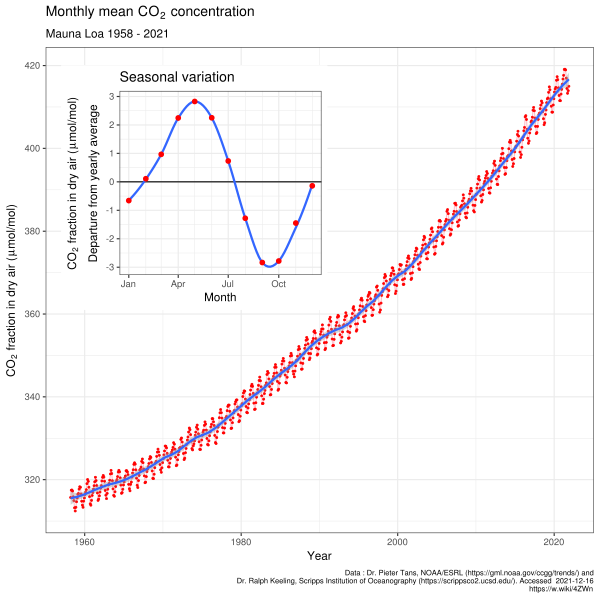

This project consists of **four parts**. In each of the parts you will need to code up some specific functions, run some code, and respond to some questions. Recall that all code needs to be properly documented with `# comments`, and the explanations in these comments will indeed be assessed and you will receive lots of marks for adequate documentation. 



* The **first part** is about loading and visualising historical $CO_2$ levels in the atmosphere.

* The **second part** asks you to write code for polynomial fitting.

* The **third part** compares global and local trend fitting.

* The **fourth part** focusses on the seasonal variations.

<br />


---

The following code box is used to load any necessary modules. **You may not import any other modules.**

In [1]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1: Loading and cleaning data [20 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.


---

**[1.1] [6 marks]** Load the data from the file "Mauna_Loa_CO2.csv" into a pandas dataframe named `Mauna_Loa_df` and display it. You should get a dataframe with 2494 rows and 9 columns with the first column looking as follows:
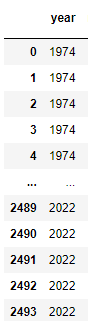

If you encounter difficulties doing this it may help to inspect the content of the csv file in a text editor.

---

In [2]:
#Load the Mauna_Loa_C02.csv file which is saved in Jupyter Notebook, and name each of the columns
Mauna_Loa_df=pd.read_csv("Mauna_Loa_CO2.csv",names=['year','month','day','decimal','average','ndays','1 year ago','10 years ago','increase since 1800'])  
#Drop all of the NaN rows, and drop the rows that contain unwanted strings. This cleans the data
Mauna_Loa_df_Clean=Mauna_Loa_df.copy().dropna().drop(index=[47])
#The indices have become inconsistent after the cleaning of the data, so reset the indices
# MachineLearningPlus,(2021) 'Pandas reset index – How to reset the index and convert the index to a column?'. Available at: https://www.machinelearningplus.com/pandas/pandas-reset-index/ (Accessed: 20 May 2021)
Mauna_Loa_df_Clean=Mauna_Loa_df_Clean.reset_index()
#An additional unwanted column called "index" appeared, so remove this column from the dataframe
Mauna_Loa_df_Clean=Mauna_Loa_df_Clean.drop(Mauna_Loa_df_Clean.columns[[0]],axis=1)
#Run the dataframe to observe its output
Mauna_Loa_df_Clean
#Also check the type of the data, to ensure that the output is in fact a dataframe
#type(Mauna_Loa_df_Clean)

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06
...,...,...,...,...,...,...,...,...,...
2489,2022,1,30,2022.0808,419.19,7,416.89,393.28,138.47
2490,2022,2,6,2022.1000,418.38,6,417.04,393.99,137.55
2491,2022,2,13,2022.1192,419.76,7,416.59,394.02,138.82
2492,2022,2,20,2022.1384,419.62,7,416.30,394.30,138.57


---
**[1.2] [6 marks]** Using this dataframe, produce a plot of the carbon dioxide data contained therein versus time. The relevant columns in the csv file are "average" and "decimal", containing average carbon dioxide levels in ppm and the date in years, respectively. 

Clearly label the content, a plot simply showing the defaults "average" and "decimal" will be insufficient. 

If you encounter difficulties it may help to inspect the content of the csv file or the dataframe directly.

---

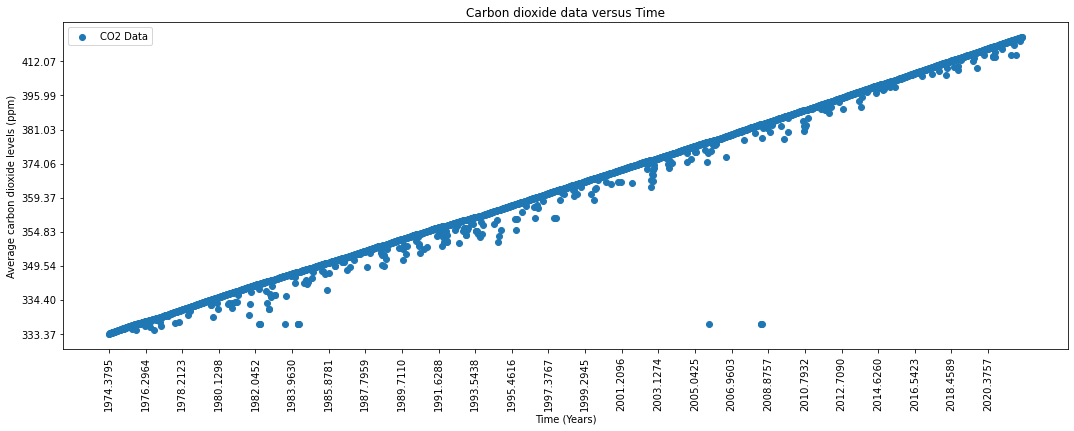

In [3]:
#Resize the figure so that it has a width of 18 and a height of 6
#This makes the graph easier to see
plt.figure(figsize=(18,6))
#Construct a list of x values from the data in the "decimal" column
#Construct a list of y values from the data in the "average" column
X_list=[x for x in Mauna_Loa_df_Clean["decimal"]]
Y_list=[y for y in Mauna_Loa_df_Clean["average"]]
#Plot a scatter plot of the data
#Add a label to the graph, so that other users know what the data represents
plt.scatter(X_list,Y_list,label= 'CO2 Data')
#Assign ax=plt.gca, as it will be used frequently for the next couple of lines
ax = plt.gca()
#Originally, there were too many years on the x axis, which made them very squashed together
#Hence, only display every 100th year tick
#Singh,S.(2020) 'Matplotlib.axes.Axes.set_xticks() in Python', Geeks for Geeks, 19 April. Available at:
#https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xticks-in-python/ (Accessed: 19 May 2020)
ax.set_xticks(ax.get_xticks()[::100])
#There were also too many ticks on the y-axis, so only display every 250th tick
ax.set_yticks(ax.get_yticks()[::250])
#Rotate the ticks on the x-axis by 90 degrees so that they are displayed vertically
#These changes make the ticks more readable
plt.xticks(rotation=90)
#Name the title of the graph
plt.title("Carbon dioxide data versus Time")
#Name the x-axis label
plt.xlabel("Time (Years)") 
#Name the y-axis label
plt.ylabel("Average carbon dioxide levels (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show()




---
**[1.3] [8 marks]** In the above plot you will have noted irregularities, presumably due to missing data. Describe these and amend the dataframe accordingly. Replot.


---

        decimal average
0     1974.3795  333.37
1     1974.3986  332.95
2     1974.4178  332.35
3     1974.4370  332.20
4     1974.4562  332.37
...         ...     ...
2489  2022.0808  419.19
2490  2022.1000  418.38
2491  2022.1192  419.76
2492  2022.1384  419.62
2493  2022.1575  419.20

[2476 rows x 2 columns]


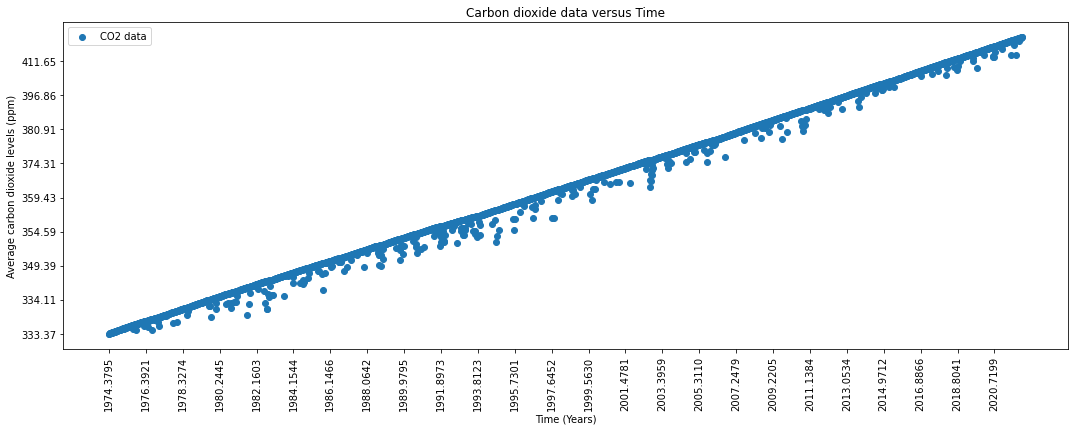

In [4]:
#By observing the graph above, we can see that there was a large drop in the average carbon dioxide levels
#This especially occurs around the years 2006 and 2008

#Drop all of the columns in the dataframe except for "decimal" and "average"
#We do this because only these two columns are relevant to this task
Relevant_data=Mauna_Loa_df_Clean.drop(['year','month','day','ndays','1 year ago','10 years ago','increase since 1800'], axis=1)
#Provide the set of relevant data between the years 2008 and 2009
#There are three anomolous results that have an average carbon dioxide level of -999.99pm
Relevant_data.loc[(Relevant_data["decimal"] >= '2008') & (Relevant_data["decimal"] <='2009')]
#Look for all of the relevant data that has an average carbon dioxide level of -999.99 ppm
Relevant_data.loc[Relevant_data["average"] == "-999.99"]
#Manually drop the rows associated to irregular data points from the dataframe (by reference to their indices)
Amended_data=Relevant_data.drop([72,81,82,83,84,110,409,412,413,481,515,516,517,518,1639,1780,1781,1782],axis=0)
#Displays the dataframe without the irregular data values
print(Amended_data)


#Now replot the graph
#Resize the figure so that it has a width of 18 units and a height of 16 units
#This makes the graph easier to see
plt.figure(figsize=(18,6))
#Construct a list of x values from the data in the "decimal" column
#Construct a list of y values from the data in the "average" column
X_list2=[x for x in Amended_data["decimal"]]
Y_list2=[y for y in Amended_data["average"]]
#Create a scatter plot using the data of X_list2 and Y_list2
#Label the data, so that other users know what the data represents
plt.scatter(X_list2,Y_list2, label= 'CO2 data')
#Assign ax=plt.gca(), as it will be used for the next few lines of code
ax = plt.gca()
#Originally, there were too many years on the x axis, which made them very squashed together 
#Hence only display every 100th year tick
ax.set_xticks(ax.get_xticks()[::100])
#There were also too many ticks on the y-axis, so only display every 250th tick
ax.set_yticks(ax.get_yticks()[::250])
#Rotate the ticks on the x-axis by 90 degrees so that they are written vertically
#These changes make the ticks more readable
plt.xticks(rotation=90)
#Name the title of the graph
plt.title("Carbon dioxide data versus Time")
#Name the x-axis label
plt.xlabel("Time (Years)") 
#Name the y-axis label
plt.ylabel("Average carbon dioxide levels (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show()

#I now observe that the graph has a closer resemblance to a straight line
#I also observe that the irregular data points from the original dataframe have been removed from the graph


#(Note: Throughout this section I have updated the name of my dataframe to make it easier to keep track of the changes
#that I implemented. I now name the cleanest form of my dataframe "Mauna_Loa_df", to keep consistent with the naming
#preferences used for the rest of this exam paper).
Mauna_Loa_df=Amended_data


# Part 2: Polynomial fitting [30 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




In this section you will develop a polynomial fitting routine in order to estimate the overall trend in the carbon dioxide curve. For this, you might want to refer to Section 7.7 in the [Linear Algebra lecture notes]( https://qmplus.qmul.ac.uk/pluginfile.php/2820808/mod_resource/content/3/notes2019.pdf) which was covered in week 11 of last term, in particular Theorem 7.35.

## Background information

In many applications, we might be given a set of data points

$$(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$$

in the $x,y$-plane, and required to determine whether there is a relationship between the $x$ variable and the $y$ variable. 
For example, a financial analyst might need to determine whether there is a relationship between two stock prices, while a climate scientist might need to know whether temperatures are related to levels of a certain pollutant in the atmosphere.

A common way to determine whether two data sets $x_1, x_2, \ldots, x_n$ and $y_1, y_2, \ldots, y_n$ are related is to find a function

$$y = f(x)$$

that 'best fits' the data, so that each $y_i$ is approximately equal to $f(x_i)$, with very small error. 

In order to find the 'best fit' the data, one attempts to minimise the **sum of squares of the errors (or "SSE")**,

$$SSE = \sum_{i=1}^n (y_i - f(x_i))^2$$

In other words, we want to minimise the sums of the squares of all the differences between the actual $y$-values (the $y_i$) and the 'predicted' $y$-values by substituting the corresponding $x_i$ values into the equation $y = f(x)$.

This process is called **least squares regression**. 

The function $f(x)$ usually depends on certain parameters for which we need to solve. 
For example, to determine whether the $x$- and $y$-variables have a **linear relationship**, we would use a linear function

$$f(x) = a_0 + a_1 x$$

and try to find the parameters $a_0$ and $a_1$ that make $f(x)$ 'best fit' the data. 
This means that we want to find the coefficients $a_0$ and $a_1$ for which the quantity
$$SSE = \sum_{i=1}^n (y_i - a_0 - a_1x_i)^2$$ is minimised.

More generally, **polynomial (least squares) regression** involves assuming that

$$f(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m$$

for some integer $m \geq 1$, and finding the parameters $a_0, a_1, a_2 \ldots, a_m$ that minimise SSE. In other words, we wish to fit a function

$$f(x) = a_0 + a_1x + a_2x^2 + \cdots a_mx^m$$

to our data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, where $m$ is some (chosen but arbitrarily large) positive integer. 
Observe that $m=1$ for linear regression, and $m=2$ for quadratic regression. 
We need to minimise

$$SSE = ||y - f(x)||^2.$$

for polynomial regression we therefore consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0&x_0^2&\cdots&x_0^m \\ 1&x_1&x_1^2&\cdots&x_1^m \\ \vdots&\vdots \\ 1&x_n&x_n^2&\cdots&x_n^m \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right],$$

and we again find that

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2,$$

meaning that $\mathbf{a}$ should be chosen to be a least squares solution of the system $X\mathbf{a} = \mathbf{y}$. 
Hence, we can find $\mathbf{a}$ by solving the normal equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

more details, in particular proofs, are given in Section 7.7 in the [Linear Algebra lecture notes]( https://qmplus.qmul.ac.uk/pluginfile.php/2820808/mod_resource/content/3/notes2019.pdf).

Python provides this functionality with the function polyfit. If you followed instructions precisely, the following should work for you.

```python

np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"],2)


---
**[2.1] [5 marks]** Ensure that the above line of code works for your dataframe.

Note: you may have to consult the documentation about the meaning of the output.

---

In [5]:
#Convert the entries of the "decimal" column to float types
#Data to Fish (2021), "How to Convert Strings to Floats in Pandas DataFrame", 3 July. Available at:
#https://datatofish.com/convert-string-to-float-dataframe/ (Accessed: 3 July 2021)
Mauna_Loa_df['decimal'] = Mauna_Loa_df['decimal'].astype(float)
#Convert the entries of the "average" column to float types
Mauna_Loa_df['average'] = Mauna_Loa_df['average'].astype(float)
#The polyfit function provides coefficients for the polynomial of degree 2 that best fits our data
#The coefficient of the 2nd order term is 1.37021827e-02
#The coefficient of the 1st order term is -5.29516062e+01 
#The value of the constant term is 5.14639463e+04
polyfit_function=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 2)
polyfit_function

array([ 1.37021827e-02, -5.29516062e+01,  5.14639463e+04])

---
**[2.2] [10 marks]** This gives you coefficients for a quadratic fit. Plot the carbon dioxide data together with the fitted curve.

---

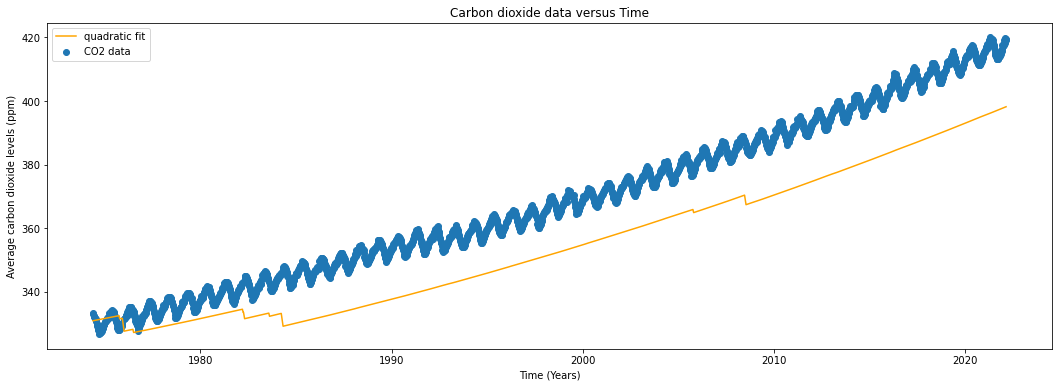

In [6]:
#Resize the figure so that it has a width of 18 units and a height of 6 units
#This makes the graph easier to see
plt.figure(figsize=(18,6))
#Construct a list of x values from the data in the "decimal" column
#Construct a list of y values from the data in the "average" column
X_list3=[float(x) for x in Mauna_Loa_df["decimal"]]
Y_list3=[float(y) for y in Mauna_Loa_df["average"]]
#Convert the output of the quadratic fit function from an array to a list
poly_list=polyfit_function.tolist()
#Ensure that the coefficient a2 is a float type
a2=float(poly_list[0])
#Ensure that the coefficient a1 is a float type
a1=float(poly_list[1])
#Ensure that the coefficient a0 is a float type
a0=float(poly_list[2])
#Construct a list of quadratic fit values according to the coefficients computed above
y_polyfit_values=[(a0)+(a1*float(X_list3[i]))+(a2*float(X_list[i])**2) for i in range(len(X_list3))]
#Plot a graph of the quadratic fit data
#Make the polyfit plot a different color to that of the CO2 data scatter points
plt.plot(X_list3,y_polyfit_values, color='orange', label= 'quadratic fit')
#Plot a scatter graph of the Carbon Dioxide data
plt.scatter(X_list3,Y_list3, label= 'CO2 data')
#Name the title of the graph
plt.title("Carbon dioxide data versus Time") 
#Name the x-axis label
plt.xlabel("Time (Years)")
#Name the y-axis label
plt.ylabel("Average carbon dioxide levels (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show() 

---
**[2.3] [10 marks]** We now would like you to replace the polyfit function by your own code, without making reference to any provided fitting routines: write a function `least_squares_solver_polynomial` which takes as input a pandas dataframe with two numerical columns containing x and y values, and the degree $m$ of a polynomial (a positive integer), and computes the corresponding polynomial regression coefficients $a_0, a_1, a_2, \ldots, a_m$. The output of your function should be a **list** of the form `[a0, a1, a2, ..., am]` containing the $m+1$ coefficients $a_0, a_1, a_2, \ldots, a_m$ in that order.

Note: you are allowed to use np.linalg.solve(), but not np.polyfit() or similar.

---

In [7]:
#(Note:I have used hashtags for any code that that may have cause an error)


#def least_squares_solver_polynomial(df,m):
#""""This function takes as input a pandas dataframe and the degree m of a polynomial,
#and returns the corresponding polynomial regression coefficients""" 
    #C1_list=df.iloc[:, [0]].values.tolist()                                          #Locate the column with index 0 and convert it into a list   
    #C1_function=[[1,*[C1_list[i] for n in range(m)]] for i in range(len(C1_list))]   #Compute the relevant values according to the theory described in the "Background Information" section
    #X=np.array(C1_function)                                                          #Convert the matrix into an array type
    #C2_list=df.iloc[:, [1]].values.tolist()                                          #Locate the column with index 1 and convert it into a list
    #y=np.array(C2_list)                                                              #Convert the list into an array type
    #A=X.T                                                                            #Transpose the array X and name this new array "A", according to the naming used in the "Background Information" section
    #b=y                                                                              #Name the array y "b", according to the naming used in the "Background Information" section
    #solution=np.linalg.solve(A,b)                                                    #Solve the normal equations
    #return list(solution)                                                            #Return the solution of the normal equations

---
**[2.4] [5 marks]** Run your least squares solver by using
```python
least_squares_solver_polynomial(Mauna_Loa_df[["decimal","average"]],2)
```

and compare the output with the above result obtained by using polyfit. How good is the agreement?

---

In [8]:
#least_squares_approx=least_squares_solver_polynomial(Mauna_Loa_df[["decimal","average"]],2)    #Compute the list of coefficients that best fit the data using the least squares solver
#polyfit_approx=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 2)                  #Compute the list of coefficients that best fit the data using the polyfit function
#((abs(least_squares_approx[0]-polyfit_approx[0]))/polyfit_approx[0])*100                       #Compute the absolute percentage difference between the coefficient of the 2nd order term computed by the least squares solver, and the polyfit solver
#((abs(least_squares_approx[1]-polyfit_approx[1]))/polyfit_approx[1])*100                       #Compute the absolute percentage difference between the coefficient of the 1st order term computed by the least squares solver, and the polyfit solver
#((abs(least_squares_approx[2]-polyfit_approx[2]))/polyfit_approx[2])*100                       ##Compute the absolute percentage difference between the coefficient of the constant term computed by the least squares solver, and the polyfit solver


# Part 3: Global fitting versus local fitting [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




If you look carefully you will notice that a quadratic fit is perhaps not the best way to capture the trend. There are two ways to improve this

1. You can experiment with taking higher degree polynomials
2. You can do local fits by computing averages

Note: if you did not manage to get least_squares_solver_polynomial to work, you are permitted to use polyfit instead.

---
**[3.1] [10 marks]** A good way to eyeball the quality of the fit and to check for systematic errors is to plot the difference between the actual and the fitted data. Produce plots showing this difference for fits with degrees one (linear) to six and describe what you can conclude.

---


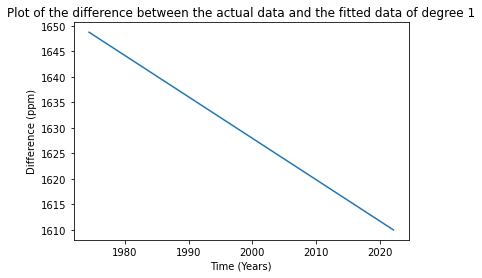

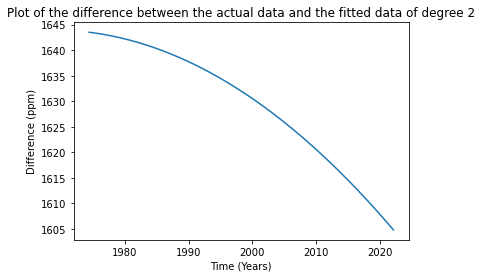

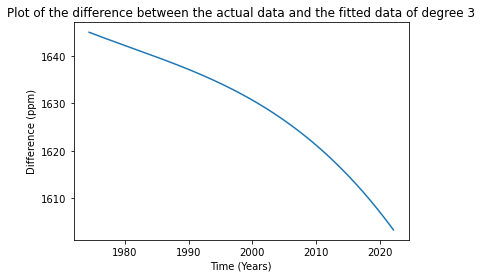

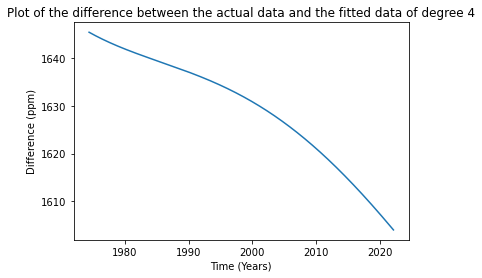

In [9]:
#Generate the polynomial coefficients for a polynomial of degree 1 that best fits our data
polyfit_1=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 1)
#Convert the coefficients into a linear function
poly=np.poly1d(polyfit_1)
#Gupta,M. (2020) 'numpy.poly1d() in Python', GeeksforGeeks, 04 December. Available at:
#https://www.geeksforgeeks.org/numpy-poly1d-in-python (Accessed: 04 December 2020).
#Convert the entries in the "decimal" column into a list
decimal_list=[x for x in Mauna_Loa_df["decimal"]]
#Apply the polynomial function to each of the entries in "decimal_list"
polyfunction1=poly(decimal_list)
#Compute the difference between each of the actual CO2 data values and the fitted data values
Difference1=[decimal_list[n]-polyfunction1[n] for n in range(2476)]
#Plot the "difference" data against the data from the "decimal" column
plt.plot(decimal_list,Difference1)
#Name the title of the figure
plt.title("Plot of the difference between the actual data and the fitted data of degree 1")
#Name the x-axis label
plt.xlabel("Time (Years)")
#Name the y-axis label
plt.ylabel("Difference (ppm)")
#Show the figure
plt.show()

#Generate the polynomial coefficients for a polynomial of degree 2 that best fits our data
polyfit_2=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 2)
#Convert the coefficients into a quadratic function
poly=np.poly1d(polyfit_2)
#Convert the entries in the "decimal" column into a list
decimal_list=[x for x in Mauna_Loa_df["decimal"]]
#Apply the polynomial function to each of the entries in "decimal_list"
polyfunction2=poly(decimal_list)
#Compute the difference between each of the actual data values and the fitted data values
Difference2=[decimal_list[n]-polyfunction2[n] for n in range(2476)]
#Plot the "difference" data against the data from the "decimal" column
plt.plot(decimal_list,Difference2)
#Name the title of the figure
plt.title("Plot of the difference between the actual data and the fitted data of degree 2")
#Name the x-axis label
plt.xlabel("Time (Years)")
#Name the y-axis label
plt.ylabel("Difference (ppm)")
#Show the figure
plt.show()

#Generate the polynomial coefficients for a polynomial of degree 3 that best fits our data
polyfit_3=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 3)
#Convert the coefficients into a cubic function
poly=np.poly1d(polyfit_3)
#Convert the entries in the "decimal" column into a list
decimal_list=[x for x in Mauna_Loa_df["decimal"]]
#Apply the polynomial function to each of the entries in "decimal_list"
polyfunction3=poly(decimal_list)
#Compute the difference between each of the actual data values and the fitted data values
Difference3=[decimal_list[n]-polyfunction3[n] for n in range(2476)]
#Plot the "difference" data against the data from the "decimal" column
plt.plot(decimal_list,Difference3)
#Name the title of the figure
plt.title("Plot of the difference between the actual data and the fitted data of degree 3")
#Name the x-axis label
plt.xlabel("Time (Years)")
#Name the y-axis label
plt.ylabel("Difference (ppm)")
#Show the figure
plt.show()

#Generate the polynomial coefficients for a polynomial of degree 4 that best fits our data
polyfit_4=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 4)
#Convert the coefficients into a quartic function
poly=np.poly1d(polyfit_4)
#Convert the entries in the "decimal" column into a list
decimal_list=[x for x in Mauna_Loa_df["decimal"]]
#Apply the polynomial function to each of the entries in "decimal_list"
polyfunction4=poly(decimal_list)
#Compute the difference between each of the actual data values and the fitted data values
Difference4=[decimal_list[n]-polyfunction4[n] for n in range(2476)]
#Plot the "difference" data against the data from the "decimal" column
plt.plot(decimal_list,Difference4)
#Name the title of the figure
plt.title("Plot of the difference between the actual data and the fitted data of degree 4")
#Name the x-axis label
plt.xlabel("Time (Years)")
#Name the y-axis label
plt.ylabel("Difference (ppm)")
#Show the figure
plt.show()

#(Note:I have not run the polyfit codes below as Python warns that these polyfit approximations may not be suitable
#for polynomial powers of 5,6 and higher).


#polyfit_5=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 5)                      #Generate the polynomial coefficients for a polynomial of degree 5 that best fits our data
#poly=np.poly1d(polyfit_5)                                                                     #Convert the coefficients into a linear function
#decimal_list=[x for x in Mauna_Loa_df["decimal"]]                                             #Convert the entries in the "decimal" column into a list
#polyfunction5=poly(decimal_list)                                                              #Apply the polynomial function to each of the entries in "decimal_list"
#Difference5=[decimal_list[n]-polyfunction5[n] for n in range(2476)]                           #Compute the difference between each of the actual data values and the fitted data values
#plt.plot(decimal_list,Difference5)                                                            #Plot the "difference" data against the data from the "decimal" column
#plt.title("Plot of the difference between the actual data and the fitted data of degree 5")   #Name the title of the figure
#plt.xlabel("Time (Years)")                                                                    #Name the x-axis label
#plt.ylabel("Difference (ppm)")                                                                #Name the y-axis label
#plt.show()                                                                                    #Show the figure


#polyfit_6=np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"], 6)                      #Generate the polynomial coefficients for a polynomial of degree 6 that best fits our data
#poly=np.poly1d(polyfit_6)                                                                     #Convert the coefficients into a linear function
#decimal_list=[x for x in Mauna_Loa_df["decimal"]]                                             #Convert the entries in the "decimal" column into a list
#polyfunction6=poly(decimal_list)                                                              #Apply the polynomial function to each of the entries in "decimal_list"
#Difference6=[decimal_list[n]-polyfunction5[n] for n in range(2476)]                           #Compute the difference between each of the actual data values and the fitted data values
#plt.plot(decimal_list,Difference6)                                                            #Plot the "difference" data against the data from the "decimal" column
#plt.title("Plot of the difference between the actual data and the fitted data of degree 6")   #Name the title of the figure
#plt.xlabel("Time (Years)")                                                                    #Name the x-axis label
#plt.ylabel("Difference (ppm)")                                                                #Name the y-axis label
#plt.show()                                                                                    #Show the figure



#Observations:
#I observe from the graph that the greatest systematic error occurs around the year 2000, 
#indicated by the greatest change in the gradient of the graph at this time.
#I also observe that the higher the degree of the polynomial, the less precise the fit is for the data 
#In addition, Python warns that the polyfit data may be poorly conditioned for the graphs concerning powers of 5 and 6.
#Furthermore, I conclude that the polynomial of degree 1 is the best fit for the data

---
**[3.2] [8 marks]** Now produce local fits. A very simple approach is to compute an average across a full year, with the date you want to estimate right in the middle. (Note: depending on how you code this, you may have to make reasonable adjustments towards the start and the end of your time range.)

To do this, you should first write a function
```python
def local_fit(data,xmin,xmax):
    # add your code
    return yaverage
```
that takes a  takes as input a pandas dataframe with two numerical columns containing x and y values, and two values xmin and xmax and returns the average over all values of y for which xmin < x < xmax.

As an example,
```python
local_fit(Mauna_Loa_df[["decimal","average"]],2000,2001)
```
should give a carbon dioxide concentration of around 369.7 ppm.

---


In [10]:
#Name the function "local_fit", and provide it with its relevant arguments
def local_fit(data,xmin,xmax):
    """This function takes as input a pandas dataframe (with two numerical columns containing
x and y values), and two values xmin and xmax. It returns the average over all values of y for which
xmin < x < xmax"""
#Define the interval range between xmin and xmax for which we will use values from the relevant columns
#I acknowledge that the dataframe Mauna_Loa_df should not be present in the definition of the function
    interval_range=Mauna_Loa_df.loc[(Mauna_Loa_df["decimal"] > xmin) & (Mauna_Loa_df["decimal"] < xmax), "average"]
#Compute the mean average from the specified interval  
    yaverage=interval_range.mean()
#Return the mean average of the values in this interval
    return yaverage

#Make sure that the example code works correctly
print(local_fit(Mauna_Loa_df[["decimal","average"]],2000,2001))

369.73301886792456


---
**[3.3] [7 marks]** Now that you have the local averaging, produce two plots, one displaying the average per year and
one displaying the difference to that average.

---


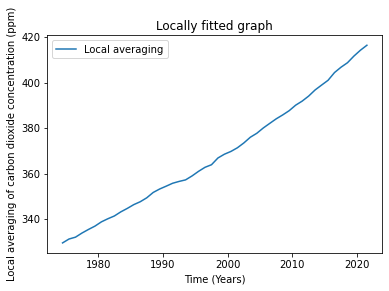

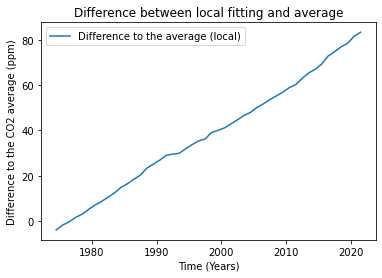

In [11]:
#Construct a list which contains the midpoint of each year from 1974 to 2022, as these will be the dates we are estimating
half_years=list(1974.5+n for n in range(48))
#Create a list that computes the local_fit function for each yearly period, from 1974 to 2022
local_fit_points=list(local_fit(Mauna_Loa_df[["decimal","average"]],1974+n,1975+n) for n in range(0,48))

#Plot local_fit_points against half_years
#Label the graph, so that other users know what the graph respresents
plt.plot(half_years,local_fit_points, label= 'Local averaging')
#Name the title of the graph
plt.title("Locally fitted graph")
#Name the x-axis label
plt.xlabel("Time (Years)")
#Name the y-axis label
plt.ylabel("Local averaging of carbon dioxide concentration (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show()

#Construct a list of all of the data points in the "average" column
list_carbon_data=list(Mauna_Loa_df["average"])
#Construct a list of the differences between each of the locally averaged points,
#and each of the points from the "average" column
difference_to_average=[local_fit_points[i]-list_carbon_data[i] for i in range(0,len(local_fit_points))]
#Plot difference_to_average against half_years
#Label the graph accordingly
plt.plot(half_years,difference_to_average, label= 'Difference to the average (local)')
#Name the title of the graph
plt.title("Difference between local fitting and average")
#Name the x-axis label
plt.xlabel(("Time (Years)"))
#Name the y-axis label
plt.ylabel("Difference to the CO2 average (ppm)")
#Add the legend to the graph
plt.legend()
#Show the graph
plt.show()


# Part 4: Looking at the yearly variations [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




For this part, we consider the difference between the carbon dioxide levels and the yearly averages. This data, while noisy, seems to oscillate with a period of one year, and it makes therefore sense to look at this oscillation more closely. In an nutshell, we are going to work towards obtaining a picture similar to the one in the inset in the Keeling curve figure at the top of this document.

---
**[4.1] [10 marks]** Plot the differences obtained in Question 3.3 versus the time of year as measured in months.

Note: it is advisable to plot individual data points that are not connected by lines

---


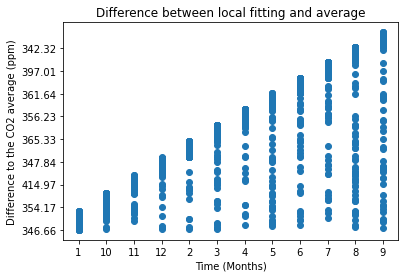

In [12]:
#Access the "month" column from the original dataframe and clean the data
Relevant_data_2=Mauna_Loa_df_Clean.drop(['year','day','ndays','1 year ago','10 years ago','increase since 1800','decimal'], axis=1)
Monthly_data=Relevant_data_2.drop([72,81,82,83,84,110,409,412,413,481,515,516,517,518,1639,1780,1781,1782],axis=0)
#Sort the values in the dataframe by "month" in ascending order
Monthly_data_sorted=Monthly_data.sort_values(by="month",ascending=True)
#Construct the sorted data values from the "month" column into a list
Monthly_data_list=list(Monthly_data_sorted["month"])
#Construct the sorted data values from the "average" column into a list
Average_data_list=list(Monthly_data_sorted["average"])
#Plot "Average_data_list" against "Monthly_data_list"
#Label the graph
plt.plot(Monthly_data_list,Average_data_list,'o', label= 'Difference between local fitting and average')
#Name the title of the graph
plt.title("Difference between local fitting and average")
#Name the x-axis label
plt.xlabel(("Time (Months)"))
#Name the y-axis label
plt.ylabel("Difference to the CO2 average (ppm)")
#Assign the variable plt.gca(), as it is needed in the following line
ax = plt.gca()
#Only display every 250th tick, to make the y-axis ticks readable and presentable
ax.set_yticks(ax.get_yticks()[::250])
#Show the graph
plt.show()



---
**[4.2] [10 marks]** Find a sensible way of interpolating the data you just plotted. Add the curve thus obtained to the plot in the previous question. You may notice that there is some roughness in your plot that indicates that we are at the limit of what we can sensibly analyse.

Note: this question is stated purposefully vaguely to give you a chance to showcase your talent (or your prowess with Google). As a timely reminder, any use of code found online must be carefully referenced, otherwise it will be deemed plagiarism.

---


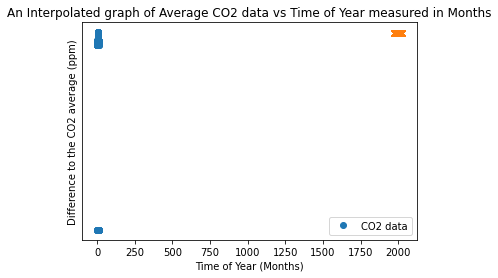

In [13]:
#(Note: The aim of the first half of this code box is to get the first two arguments of the np.interp() function into
#their accepted forms i.e. two 1-dimensional arrays of equal size. The aim of the second half of this code box is then 
#to plot the required graph).

#We will use 1000 equally spaced plot points between 1974 and 2022 for the interpolation
x_vals=np.linspace(1974,2022,1000)
#Convert the list containing the "average" column data values into a dataframe type
Average_data_2 = pd.DataFrame(Average_data_list)
#Convert all of the entries of the "month" column to float types, and then convert the data into an array
np_Monthly_data=Monthly_data_sorted.astype(float).to_numpy()
#Use slicing to transform the 2-dimensional array into a 1-dimensional array 
#This is because the np.interp function only accepts 1-dimensional arrays 
Monthly_data_1d=np_Monthly_data[:,0]
#Convert the entries of the "average" column to float types, and then convert the dataframe into a numpy array
np_Average_data=Mauna_Loa_df_Clean["average"].astype(float).to_numpy()
#Convert the array into a list (this is because the computations below can only be performed on a list )
Average_data_list=np_Average_data.tolist()
#Remove the last 18 entries of the list, because in order for the np.interp() function to work, the array's have to be of
#equal size
#(Note: I am aware that this is not the best method for creating equally sized arguments, as it removes data points)
Average_data_list_2 = Average_data_list[:-18 or None]
#Convert the list into an array
Average_data_array=np.array(Average_data_list_2)
#Reshape the array so that it becomes a 1-dimensional array
#The data is now in an acceptable form to be the argument of the np.interp function
Average_data_1d=np.reshape(Average_data_array,Average_data_array.size)


#Lathiyam,A. (2022) 'Np.Interp: How To Find Interpolant In Python' AppDividend, 23 Feb. Available at:
#https://appdividend.com/2022/02/23/np-interp/ (Accessed: 23 Feb 2022).
#The np.interp() function returns the one-dimensional interpolant to a function
y_vals=np.interp(x_vals,Monthly_data_1d,Average_data_1d)
#Plot the actual data
plt.plot(Monthly_data_1d,Average_data_1d,'o', label= 'CO2 data')
#Plot the interpolated data in a graph
plt.plot(x_vals,y_vals,'-x')
#Name the title of the graph
plt.title("An Interpolated graph of Average CO2 data vs Time of Year measured in Months")
#Name the x-axis label
plt.xlabel(("Time of Year (Months)"))
#Name the y-axis label
plt.ylabel("Difference to the CO2 average (ppm)")
#Assign plt.gca(), as it is needed in the following line
ax = plt.gca()
#Only display every 250th tick, to make the y-axis ticks more readable
ax.set_yticks(ax.get_yticks()[::250])
#Add the legend
plt.legend()
#Show the graph
plt.show()

---
**[4.3] [5 marks]** You are now in a position to clearly separate overall trend, seasonal variation, and residual effects. Finish the project by creating a plot of the residual noise, similar to the bottom graph in the image below. Describe how the residual effects compare to the seasonal variation.

(You are welcome to provide all four plots together, but you will only be assessed on plotting the residual effects.)


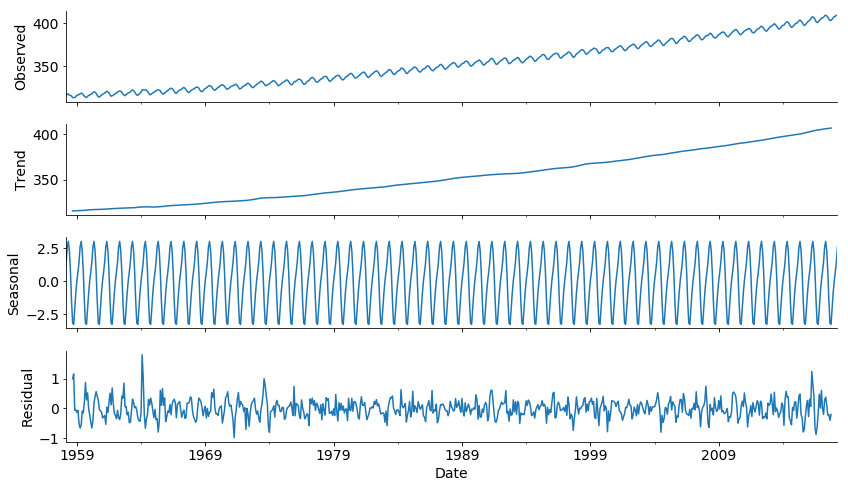

---


In [14]:
#The residual noise is greatest at the corresponding peaks and troughs of the seasonal variation graph. This is because the
#residual noise is greatest around the largest changes in the carbon dioxide levels, which occur near the extreme points.